<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/DimensionalityReduction_SVD_Application_ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Singular Value Decomposition

SVD is basically a matrix factorization technique, which decomposes any matrix into 3 generic and familiar matrices. It has some cool applications in Machine Learning and Image Processing. To understand the concept of Singular Value Decomposition the knowledge on eigenvalues and eigenvectors is essential.

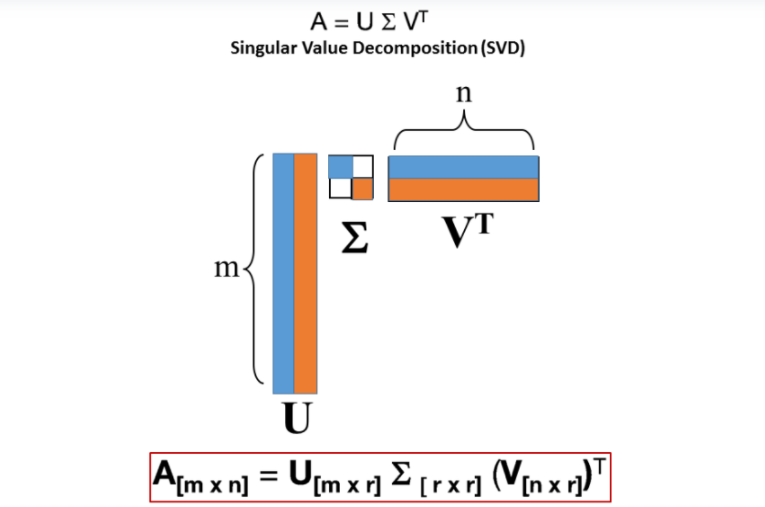

To Compress image by varying matrix U,S,V

    To get blur image
    reduce columns of U
    reduce diagonals of S
    reduce rows of V

In [2]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2


###Read Image using opencv and convert to grey

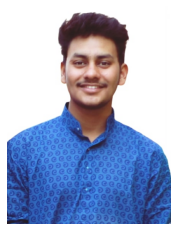

In [11]:
image=cv2.imread('/content/Tanveer_Shikalgar_Photo.jpg',)
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

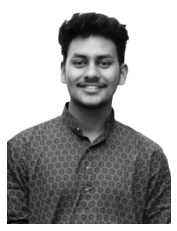

In [13]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(gray,cmap="gray")

###Get Matrices U,S,V

In [14]:
U,S,V=np.linalg.svd(gray,full_matrices=False)
print(U.shape)
print(S.shape)
print(V.shape)

(577, 433)
(433,)
(433, 433)


###Get blured image

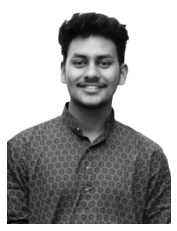

In [16]:
#To get blur image
# reduce columns of U
# reduce diagonals of S
# reduce rows of V

blur1=U[:,:] @ np.diag(S[:]) @ V[:,:]
plt.axis("off")
plt.imshow(blur1,cmap="gray")

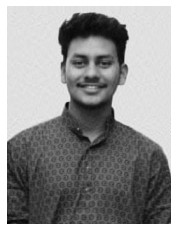

In [17]:
blur3=U[:,:50] @ np.diag(S[:50]) @ V[:50,:]
plt.axis("off")
plt.imshow(blur3,cmap="gray")

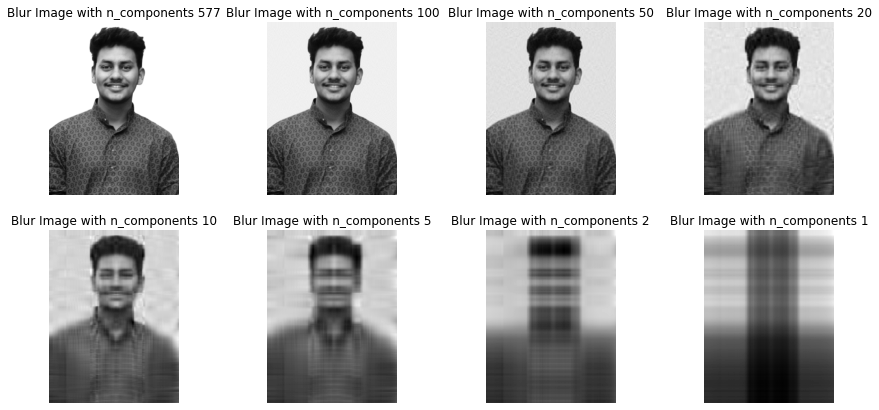

In [18]:
comps=[U.shape[0],100,50,20,10,5,2,1]
fig=plt.figure(figsize=(15,7))
for i in range(len(comps)):
    trans_image=U[:,:comps[i]]@ np.diag(S[:comps[i]]) @ V[:comps[i],:]
    plt.subplot(2,4,i+1)
    plt.axis("off")
    plt.imshow(trans_image,cmap="gray")
    plt.title("Blur Image with n_components "+str(comps[i]))